# Scikit-Learn Perceptron

## import data

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
# show class labels
np.unique(y)

array([0, 1, 2])

split the data into seperate training and test data sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # set 30% test data

Standardlize the deatures

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

train a preceptron model

In [6]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

make predictions

In [7]:
y_pred = model.predict(X_test_std)
print("Misclassfication samples: %d" % (y_test != y_pred).sum())

Misclassfication samples: 5


calculate the classfication accuracy

In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.89


Use `polt_dicision_region` to plot the decision region of our newly trained model

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classfier, test_idx=None, resolution=0.02):
    # setup maker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colors = np.array(colors)
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision region
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
#     X_test, y_test = X[test_idx, :], y[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='white',
                   alpha=1.0, linewidths=1, marker='v',
                   s=55, label='test set')

specify the indices of the samples that we want to mark on the resulting plots.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


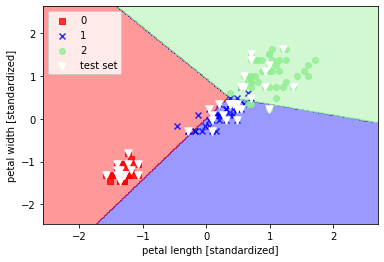

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=X_combined_std, y=y_combined,
                    classfier=model,
                    test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Logistic Regression

## Sigmoid function
The logistic function, or sigmoid function, is defined as:
$$
\phi(z)=\frac{1}{1+e^{-z}}
$$

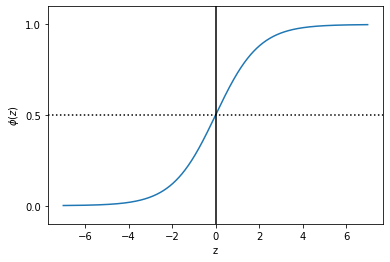

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

z = np.arange(-7, 7, 0.01)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0, 0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

## The loss function
The likelihood function is defined as
$$
L(w)=P(y|x;w)=\prod_{i=1}^NP(y^{(i)}|x^{(i)};w)=(\phi(z^{(i)}))^{y^{(i)}}(1-\phi(z^{(i)}))^{1-y^{(i)}}
$$

To maximize the likelihood function, it is the same as minimize the the following cost function

$$
J(w)=\sum_{i=1}^n-\log(\phi(z^{(i)})-(1-\phi(z^{(i)}))^{1-y^{(i)}}
$$

## Training the model

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


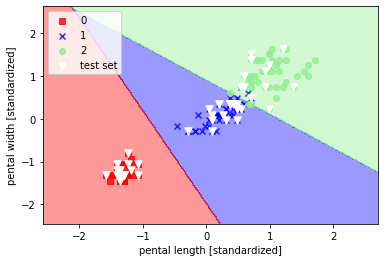

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0, random_state=0, solver='lbfgs', multi_class='ovr')
model.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classfier=model, test_idx=range(105, 150))
plt.xlabel('pental length [standardized]')
plt.ylabel('pental width [standardized]')
plt.legend(loc='upper left')
plt.show()

predict the class-membership probability of the samples

In [13]:
model.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[1.61626478e-12, 6.12294065e-02, 9.38770594e-01]])

In [14]:
X_test_std[0, :]

array([0.70793846, 1.51006688])

## gradient of the cost function
We have
$$
\nabla J(w)=\frac{\partial}{\partial w}J(w)=(y-\phi(z))x
$$
The weigth update
$$
w = w - \eta*\nabla J(w)
$$
where $\eta$ is the learning rate

## Tackling overfitting via regularization
Our model may suffer from the overfitting or the underfitting problems, we can solve this problem via regularization. The common choice is to add a regularization term.

Thus our cost function becomes:
$$
J(w)=[\sum_{i=1}^n-\log(\phi(z^{(i)})-(1-\phi(z^{(i)}))^{1-y^{(i)}}]+\frac{\lambda}{2}\|w\|_2^2
$$
where $\lambda$ is the regularization parameter. By increasing the value of $\lambda$, we increasing the regularization strength.

Note that the paramter $C$ in the logistic regression function is the inverse of $\lambda$:
$$
C=\frac{1}{\lambda}
$$

visualize by plotting the L2 regularization path for the two weight coefficients

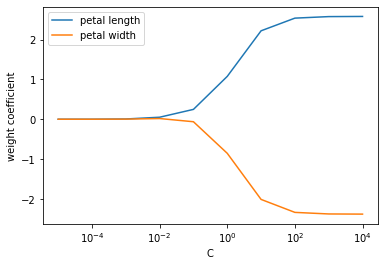

In [15]:
weights, params =[], []
for c in np.arange(-5, 5, dtype=float):
    model = LogisticRegression(C=10**c, random_state=0, solver='lbfgs', multi_class='ovr')
    model.fit(X_train_std, y_train)
    weights.append(model.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend(loc='upper left')
plt.show()

# Support Vector Machine

## Idea
The idea of SVM is to maximize the margin, where the margin is defined as the distance between the seperating hyperplane and the training samples that are closest to this hyperplane, which are so called **support vectors**.
Thus the model tends to have low generalization error.

## Formula
First, note that the positive and negative hyperplane that parallel to the decision boundary:
$$
w_0+w^Tx_{pos}=1\\
w_0+w^Tx_{neg}=-1
$$
substract two equations:
$$
w^T(x_{pos}-x_{neg})=2
$$
normarlize the equation by the length of $w$:
$$
\frac{w^T(x_{pos}-x_{neg})}{\|w\|_2}=\frac{2}{\|w\|_2}
$$
Now the LFS is the distance between the positive and negative hyperplane, which is exactly we want to maximize

Now our target is to maximize 
$$
\frac{2}{\|w\|_2}
$$
under the constraints that the samples are classfied correctly, that is, 
$$
y^{(i)}(w_0+w^Tx^{(i)})\geq 1,\forall i
$$
The following figure can show the intuition:
        ![](./svm_with_reg.png)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


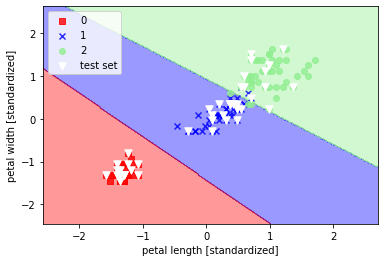

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classfier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Dealing with the misclassfication case with slack variable
The motivation for introducing the slack variable $\xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization.

The positive slack variable is simply added to the linear constraints:
$$
w^Tx^{(i)}\geq 1, \text{ if }y^{(i)}=1-\xi^{(i)}\\
w^Tx^{(i)}\leq -1, \text{ if }y^{(i)}=1+\xi^{(i)}
$$ 
so the objective function becomes
$$
\frac12 \|w\|_2^2+C(\sum_{i}\xi^{(i)})
$$
The effect of $C$ can be seen as follows:
        ![aa](./svm.png)

# Kernel SVM for non-linear problems
another reason why SVM is popular in machine learning, is that SVM can be easily kernelized for non-linear classfication problems

## Data generation
we will create a simple dataset that has the form of an XOR gate using the 
`logical_xor function` from NumPy, where 100 samples will be assigned the 
class label 1 and 100 samples will be assigned the class label -1, respectively:

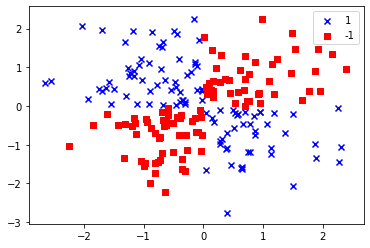

In [17]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
           c='r', marker='s', label='-1')
# plt.ylim(-3.0)
plt.legend()
plt.show()

## Idea
The basic idea behind kernel methods to deal with such linearly inseparable data 
is to create nonlinear combinations of the original features to project them 
onto a higher dimensional space via a mapping function $\phi(\cdot)$ 
where it becomes linearly separable.

One of the most widely used kernels is the **Radial Basis Function kernel (RBF kernel)** or Gaussian kernel:
$$
k(x^i, x^j)=\exp(-\frac{\|x^i-x^j\|^2}{2\sigma^2})
$$
where $\sigma$ is a free parameter to be optimized. (We often use $\gamma=1/(2\sigma^2)$ instead)

Roughly speaking, the term kernel can be interpreted as a similarity function between a pair of samples. The minus sign inverts the distance measure into a similarity score and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar samples) and 0 (for very dissimilar samples).

The $\gamma$ parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for $\gamma$ , we increase the influence or reach of the training samples, which leads to a softer decision boundary.

## Train a kernel SVM

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


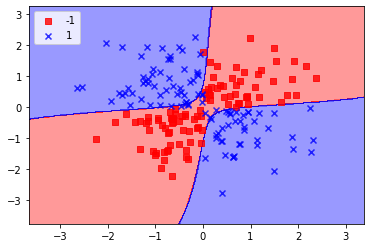

In [18]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_region(X_xor, y_xor, classfier=svm)
plt.legend(loc='upper left')
plt.show()

## Study the influence of $\gamma$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


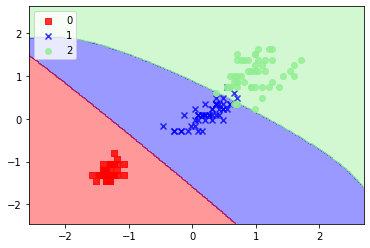

In [19]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classfier=svm)
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


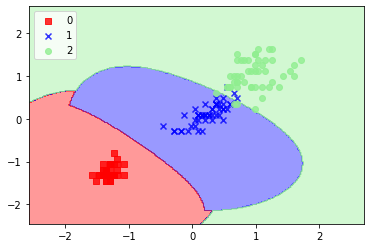

In [20]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.5, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classfier=svm)
plt.legend(loc='upper left')
plt.show()

# Decision Tree

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG):
$$
IG(D_p, f)=I(D_p)-\sum_{i=1}^m\frac{N_j}{N_p}I(D_j)
$$
here, $f$ is the feature to perform the split, $D_p$ and $D_j$ are the dataset of the parent and $j$-th child node, $I$ is our impurity measure, $N_p$ is the total number of samples at the parent node, and $N_j$ is the number of samples in $j$-th child node.

Basically, the information gain is simply the difference between the impurity of the parent node and the sum of the child purities, which means the lower the inpurities of the child nodes, the larger the information gain.

Usually, we will use binary search tree:
$$
IG(D_p, a)=I(D_p)-\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})
$$

Three impurity measures are commonly used in binary search: **Gini index($I_G$)**, **entropy($I_H$)**, and the **classification error($I_E$).

First, we define the entropy for all **non-empty** classes ($p(i|t)\neq 0$)
$$
I_H(t)=-\sum_{i=1}^cp(i|t)\log_2p(i|t)
$$
where $p(i|t)$ is the propotion of the samples that belongs to class $c$ for a particular node $t$. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution.

Intuitively, the Gini index can be understood as a criterion to minimize the probability of misclassification:
$$
I_G(t)=\sum_{i=1}^cp(i|t)(-p(i|t))=1-\sum_{i=1}^cp(i|t)^2
$$

The classification error
$$
I_E=1-\max\{p(i|t)\}
$$
This is a useful criterion for pruning but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes.

## visual comparison of the three different impurity criteria

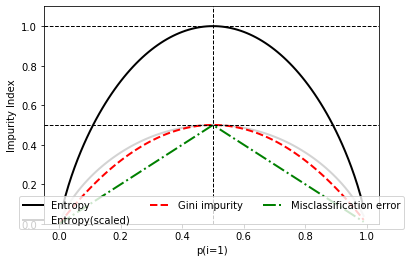

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return 2 * p * (1 - p)

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for idx, label_func, line_style, color_func in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy(scaled)', 'Gini impurity',
                        'Misclassification error'],
                        ['-', '-', '--', '-.'],
                        ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, idx, label=label_func, linestyle=line_style, linewidth=2, color=color_func)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
ax.axvline(x=0.5, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()
    

## building a decision tree

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


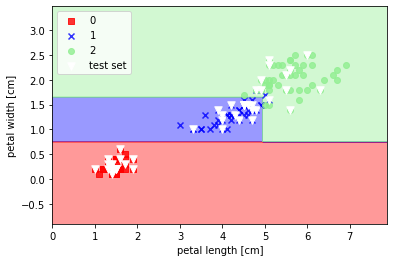

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X_combined, y_combined, classfier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()


## Random forest
Intuitively, a random forest can be considered as an ensemble of decision trees. The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization error and is less susceptible to overfitting. The random forest algorithm can be summarized in four simple steps:
1. Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:
    1. Randomly select d features without replacement.
    2. Split the node using the feature that provides the best split according to the objective function, for instance, by maximizing the information gain.
3. Repeat the steps 1 to 2 $k$ times.
4. Aggregate the prediction by each tree to assign the class label by majority vote.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


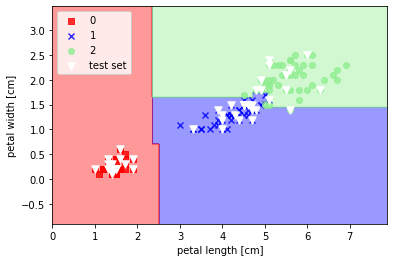

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
# the n_jobs parameter for demonstration purposes, which allows us to parallelize the model training 
# using multiple cores of our computer (here, two).
forest.fit(X_train, y_train)
plot_decision_region(X_combined, y_combined, classfier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

# K-nearest neighbor

## KNN algorithm
The algorithm can be described as follow three steps:
    1. Choose the number of $k$ and distance metric
    2. find the $k$ nearest neighbors of the sample that we want to classify
    3. assign the class label by majority vote

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


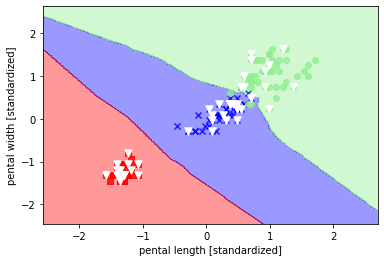

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_region(X_combined_std, y_combined, classfier=knn, test_idx=range(105, 150))
plt.xlabel('pental length [standardized]')
plt.ylabel('pental width [standardized]')
plt.show()